In [1]:
%matplotlib inline
import pandas
import numpy
import datetime

In [2]:
df = pandas.read_csv("results-20181013-092352.csv", parse_dates=["timestamp"])
df.columns

Index(['timestamp', 'country_code', 'file_version', 'details_distro_name',
       'details_distro_version', 'details_system_name',
       'details_system_release', 'details_cpu'],
      dtype='object')

In [3]:
df.sort_values("timestamp", inplace=True)

In [4]:
df["unique"] = (df["country_code"].map(str) +
                df["details_distro_name"].map(str) +
                df["details_distro_version"].map(str) +
                df["details_system_name"].map(str) +
                df["details_system_release"].map(str) +
                df["details_cpu"].map(str))

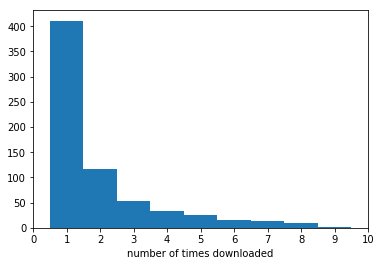

In [5]:
plt = df.groupby("unique").count().hist("timestamp", bins=numpy.arange(0.5, 10.5))[0][0]
plt.set_title("")
plt.set_xlabel("number of times downloaded")
plt.set_xticks(range(11))
plt.grid(False)
plt.get_figure().savefig("uniques.svg")

In [6]:
df.drop_duplicates("unique", keep="last", inplace=True)

In [7]:
len(df)

732

In [8]:
df["since_inception"] = df["timestamp"] - datetime.datetime(2017, 9, 14)

In [9]:
df["weeks_since"] = df["since_inception"].dt.days / 7

In [10]:
df["major_version"] = df["file_version"].apply(lambda x: x[0])

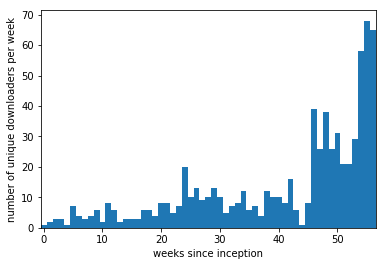

In [11]:
plt = df["weeks_since"].hist(bins=numpy.arange(-0.5, 57.5))
plt.set_xlim(-0.5, 56.5)
plt.grid(False)
plt.set_xlabel("weeks since inception")
plt.set_ylabel("number of unique downloaders per week")
plt.get_figure().savefig("weeks.svg")

In [12]:
df2 = pandas.DataFrame({"weeks": numpy.round(df["weeks_since"]).astype(int),
                        "uproot 1.x": df["major_version"] == "1",
                        "uproot 2.x": df["major_version"] == "2",
                        "uproot 3.x": df["major_version"] == "3"})

In [13]:
for i in range(int(numpy.ceil(57.5*7))):
    x = datetime.datetime(2017, 9, 14) + datetime.timedelta(days=i)
    if x.day == 1:
        print(i, x)

17 2017-10-01 00:00:00
48 2017-11-01 00:00:00
78 2017-12-01 00:00:00
109 2018-01-01 00:00:00
140 2018-02-01 00:00:00
168 2018-03-01 00:00:00
199 2018-04-01 00:00:00
229 2018-05-01 00:00:00
260 2018-06-01 00:00:00
290 2018-07-01 00:00:00
321 2018-08-01 00:00:00
352 2018-09-01 00:00:00
382 2018-10-01 00:00:00


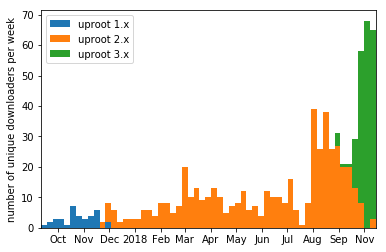

In [14]:
plt = df2.groupby("weeks").sum().plot.bar(stacked=True, width=1)
plt.set_xlim(-0.5, 56.5)
plt.set_xlabel("")
plt.set_ylabel("number of unique downloaders per week")
plt.set_xticks(numpy.array([17, 48, 78, 109, 140, 168, 199, 229, 260, 290, 321, 352, 382]) / 7)
plt.set_xticklabels(["Oct", "Nov", "Dec", "2018", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Nov"])
plt.tick_params("x", labelrotation=0)
plt.get_figure().savefig("weeks_byversion.svg")

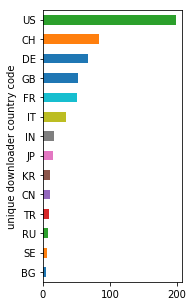

In [15]:
df3 = df.groupby("country_code").count()["timestamp"]
df3 = df3.sort_values()
df3 = df3[df3 > 4]
plt = df3.plot.barh(figsize=(2.5, 5))
plt.set_ylabel("unique downloader country code")
plt.get_figure().savefig("country_code.svg")

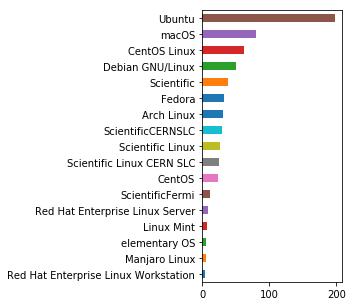

In [16]:
df3 = df.groupby("details_distro_name").count()["timestamp"]
df3 = df3.sort_values()
df3 = df3[df3 > 4]
plt = df3.plot.barh(figsize=(2.5, 5))
plt.set_ylabel("")
plt.get_figure().savefig("distro_name.svg")